# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Практическое задание

1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.
2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

1-2. (*) Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [ ]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install tf-nightly

In [ ]:
%tensorflow_version 2.x

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import itertools
from IPython.display import clear_output

from sklearn.datasets import load_boston

In [19]:
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.8.0
TensorFlow 2.0 Hello World


In [20]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


In [21]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000
 - PTRATIO  pupil-teacher ratio by town
 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    % lower status of the population
 - MEDV

In [22]:
column_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO' 'B', 'LSTAT', 'MEDV']

In [23]:
boston_df = pd.DataFrame(data, columns=column_name)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIOB,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
boston_df['target'] = target

In [25]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIOB,LSTAT,MEDV,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIOB,LSTAT,MEDV,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [27]:
train_dataset = boston_df.sample(frac=0.8, random_state=0)
train_features = train_dataset[column_name]
train_labels = train_dataset['target']

test_dataset = boston_df.drop(train_dataset.index)
test_features = test_dataset[column_name]
test_labels = test_dataset['target']

In [28]:
train_dataset.shape, test_dataset.shape

((405, 14), (101, 14))

In [29]:
array_train = np.array(train_features)

normalizer = Normalization(input_shape=[13,], axis=None)
normalizer.adapt(array_train)

In [30]:
array_train.shape

(405, 13)

In [31]:
normlize_regression_model = Sequential([
    normalizer,
    Dense(units=128, activation='relu', input_shape=(13,)),
    Dense(units=64, activation='relu', input_shape=(13,)),
    Dense(units=32, activation='relu', input_shape=(13,)),
    Dense(units=1, activation='relu', input_shape=(13,))
])

normlize_regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 13)               3         
 ion)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               1792      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,164
Trainable params: 12,161
Non-trainable params: 3
__________________________________________________

In [32]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, metric, logs=None):
    clear_output(wait=True)
    print(metric)

In [33]:
normlize_regression_model.compile(optimizer='adam', # rmsprop 
                     loss='mse',
                     metrics=['mae'])

In [34]:
print("On GPU:")
with tf.device("GPU:0"):
    history = normlize_regression_model.fit(train_features, 
                    train_labels, 
                    epochs=100, 
                    batch_size=10,
                    validation_split=0.1, 
                    verbose=2,
                    callbacks=[DisplayCallback()])

{'loss': 28.58770751953125, 'mae': 3.807220697402954, 'val_loss': 51.00566101074219, 'val_mae': 4.893015384674072}
37/37 - 0s - loss: 28.5877 - mae: 3.8072 - val_loss: 51.0057 - val_mae: 4.8930 - 148ms/epoch - 4ms/step


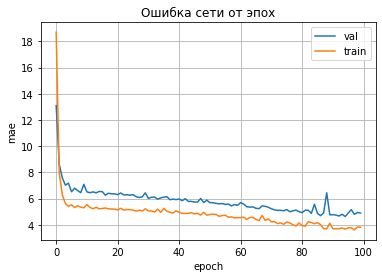

In [35]:
plt.plot(history.history['val_mae'] ,label='val')
plt.plot(history.history['mae'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mae')
plt.title('Ошибка сети от эпох')
plt.grid()
plt.show()

In [36]:
column_name_result = ['index', 'iteration', 'loss_name', 'metric_name', 
                      'train_metrics', 'valid_metrics', 'mae', 'mse', 'R2']
df_result = pd.DataFrame(columns=column_name_result)

In [37]:
def modeling(normalizer, activation_func, loss_func, optimizer_func, metric,
             train_features, train_labels, epoch, batch, df_result, count, 
             test_features, test_labels):
  for iter in [1, 2, 3, 4, 5]:
    regression_model = Sequential([
      normalizer,
      Dense(units=128, activation=activation_func, input_shape=(13,)),
      Dense(units=64, activation=activation_func, input_shape=(13,)),
      Dense(units=32, activation=activation_func, input_shape=(13,)),
      Dense(units=1, activation=activation_func, input_shape=(13,))
    ])

    regression_model.compile(optimizer=optimizer_func, 
                     loss=loss_func,
                     metrics=[metric])
  
    with tf.device("GPU:0"):
      history = regression_model.fit(train_features, 
                    train_labels, 
                    epochs=epoch, 
                    batch_size=batch,
                    validation_split=0.1, 
                    verbose=2, 
                    callbacks=[DisplayCallback()])
    
    predictions = regression_model.predict(test_features)

    r2_metric = r2_score(test_labels, predictions)
    mae_metric = mean_absolute_error(test_labels, predictions)
    mse_metric = mean_squared_error(test_labels, predictions)

    dict_result = dict()
    dict_result['index'] = count
    dict_result['iteration'] = int(iter)
    dict_result['loss_name'] = loss_func
    dict_result['metric_name'] = metric
    dict_result['train_metrics'] = history.history[metric][-1]
    name_val_metric = 'val_' + metric
    dict_result['valid_metrics'] = history.history[name_val_metric][-1]
    dict_result['mae'] = mae_metric
    dict_result['mse'] = mse_metric
    dict_result['R2'] = r2_metric
    df_result = pd.concat([df_result, pd.DataFrame(dict_result, index=range(count, count+1))])
    count += 1
  return df_result, count

In [38]:
epoch = 200
batch = 10
count = 0
metrics = ['mae', 'mse']  
loss = ['mae', 'mse', 'SquaredHinge']

for metric, loss in itertools.product(metrics, loss):
  df_result, count = modeling(normalizer, 'relu', loss, 'adam', metric, 
             train_features, train_labels, epoch, batch, df_result, count, 
             test_features, test_labels)

{'loss': 0.0, 'mse': 559.921142578125, 'val_loss': 0.0, 'val_mse': 653.0367431640625}
37/37 - 0s - loss: 0.0000e+00 - mse: 559.9211 - val_loss: 0.0000e+00 - val_mse: 653.0367 - 174ms/epoch - 5ms/step


In [39]:
df_result

,index,iteration,loss_name,metric_name,train_metrics,valid_metrics,mae,mse,R2
0,0,1,mae,mae,3.252075,4.330577,3.553040,28.785237,0.721301
1,1,2,mae,mae,22.335712,23.726830,22.758416,621.229703,-5.014760
2,2,3,mae,mae,3.438103,4.425052,4.467545,32.149460,0.688728
3,3,4,mae,mae,3.277372,5.069193,3.760676,36.249061,0.649036
4,4,5,mae,mae,22.335714,23.726830,22.758416,621.229703,-5.014760
5,5,1,mse,mae,3.028784,3.941905,3.386127,23.101452,0.776331
6,6,2,mse,mae,3.209096,4.677960,3.632137,32.891838,0.681541
7,7,3,mse,mae,2.892867,3.834020,3.269527,21.021329,0.796471
8,8,4,mse,mae,22.335718,23.726830,22.758416,621.229703,-5.014760
9,9,5,mse,mae,22.335712,23.726830,22.758416,621.229703,-5.014760


Вывод: наилучший результат для текущих параметров показывает модель с метрикой mse и функцией потерь mse. Данная пара показывает наиболее высокие значения метрики R2 (5 из 5 перезапусков показали достаточно хороший результат).  

Полезные команды TensorFlow:
1. tensorflow.keras.layers.normalization выполняет предобработку данных (нормализует значения)
2. tensorflow.debugging содержит набор функций assert для проверки различных условий (поэлементная проверка на ноль, на поэлементное равенство, на тип переменной)